In [1]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit import Parameter
from qiskit_ibm_provider import IBMProvider
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler import PassManager, Layout
from qiskit.transpiler.passes import SetLayout, ApplyLayout, ALAPSchedule, ALAPScheduleAnalysis, BasisTranslator, ASAPSchedule

In [2]:
provider = IBMProvider()

# Create circuits - 1

In [3]:
ibm_backend_name = 'ibmq_guadalupe'
backend = provider.get_backend(ibm_backend_name)

In [4]:
qregs = QuantumRegister(backend.num_qubits)

In [5]:
qcs = []

## Just delay

In [6]:
qc = QuantumCircuit(qregs, name='just delay')
qc.delay(9000, qregs)
qc.measure_all()
qcs.append(qc)
# qc.draw('mpl')

## H delay H

In [7]:
qc = QuantumCircuit(qregs, name='h delay h')
qc.h(qregs)
qc.delay(9000, qregs)
qc.h(qregs)
qc.measure_all()
qcs.append(qc)
# qc.draw('mpl')

## sx, delay, sx, x

In [8]:
qc = QuantumCircuit(qregs, name='sx delay sx x')
qc.sx(qregs)
qc.delay(9000, qregs)
qc.sx(qregs)
qc.x(qregs)
qc.measure_all()
qcs.append(qc)
# qc.draw('mpl')

## Run on IBMQ

In [9]:
pm = generate_preset_pass_manager(0, backend)
tqcs = pm.run(qcs)

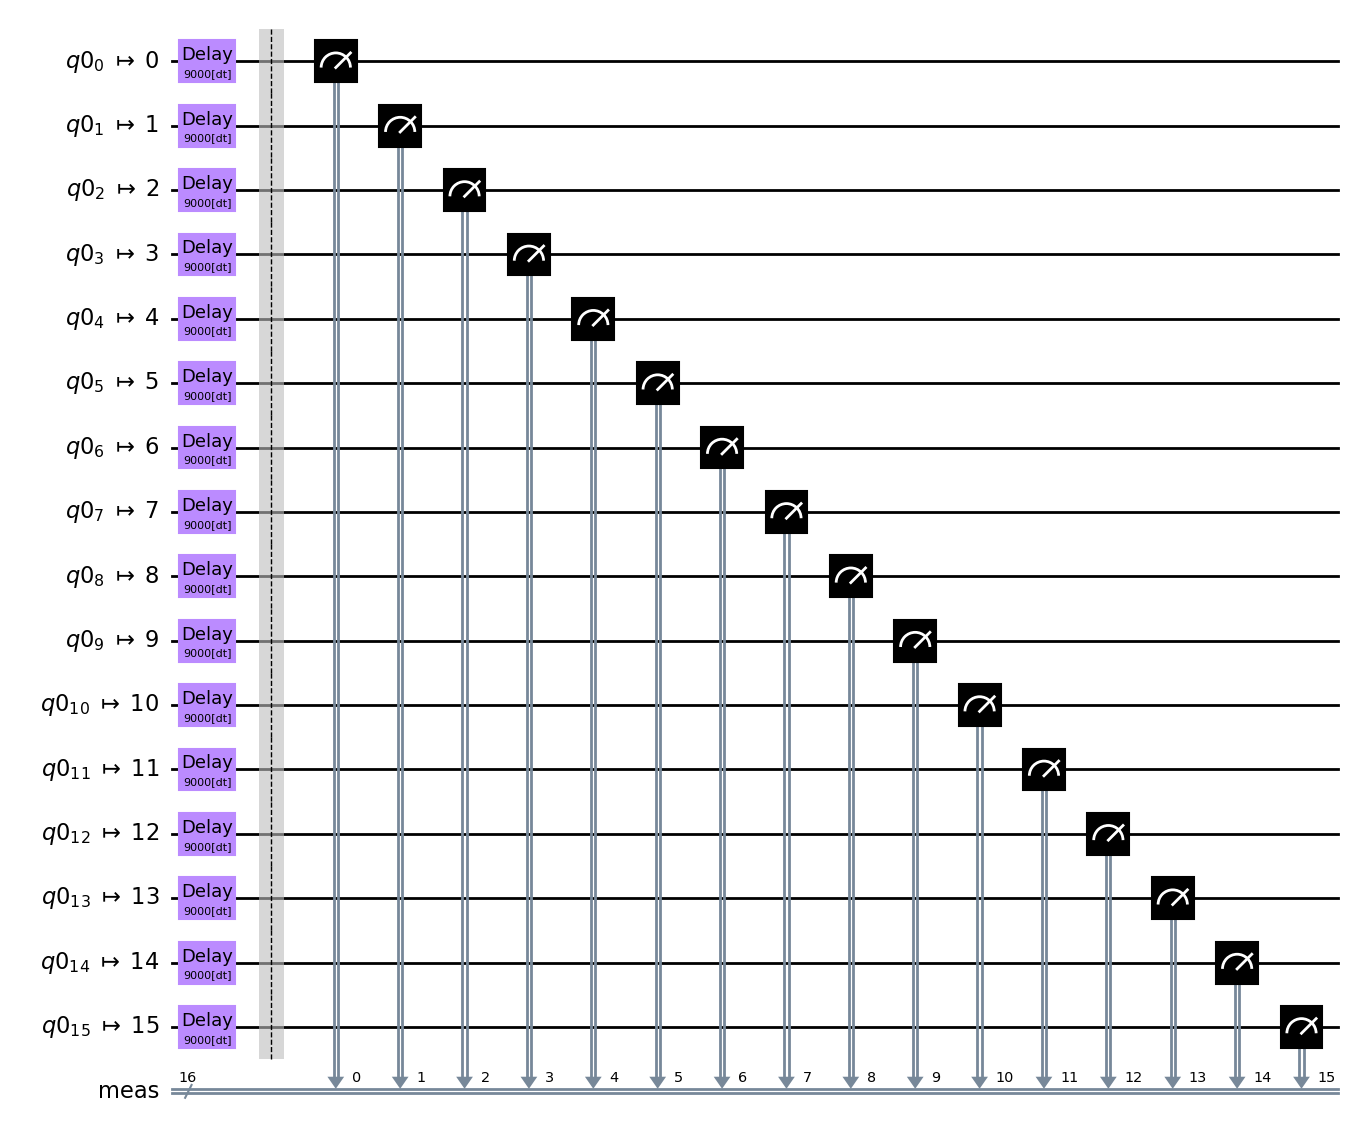

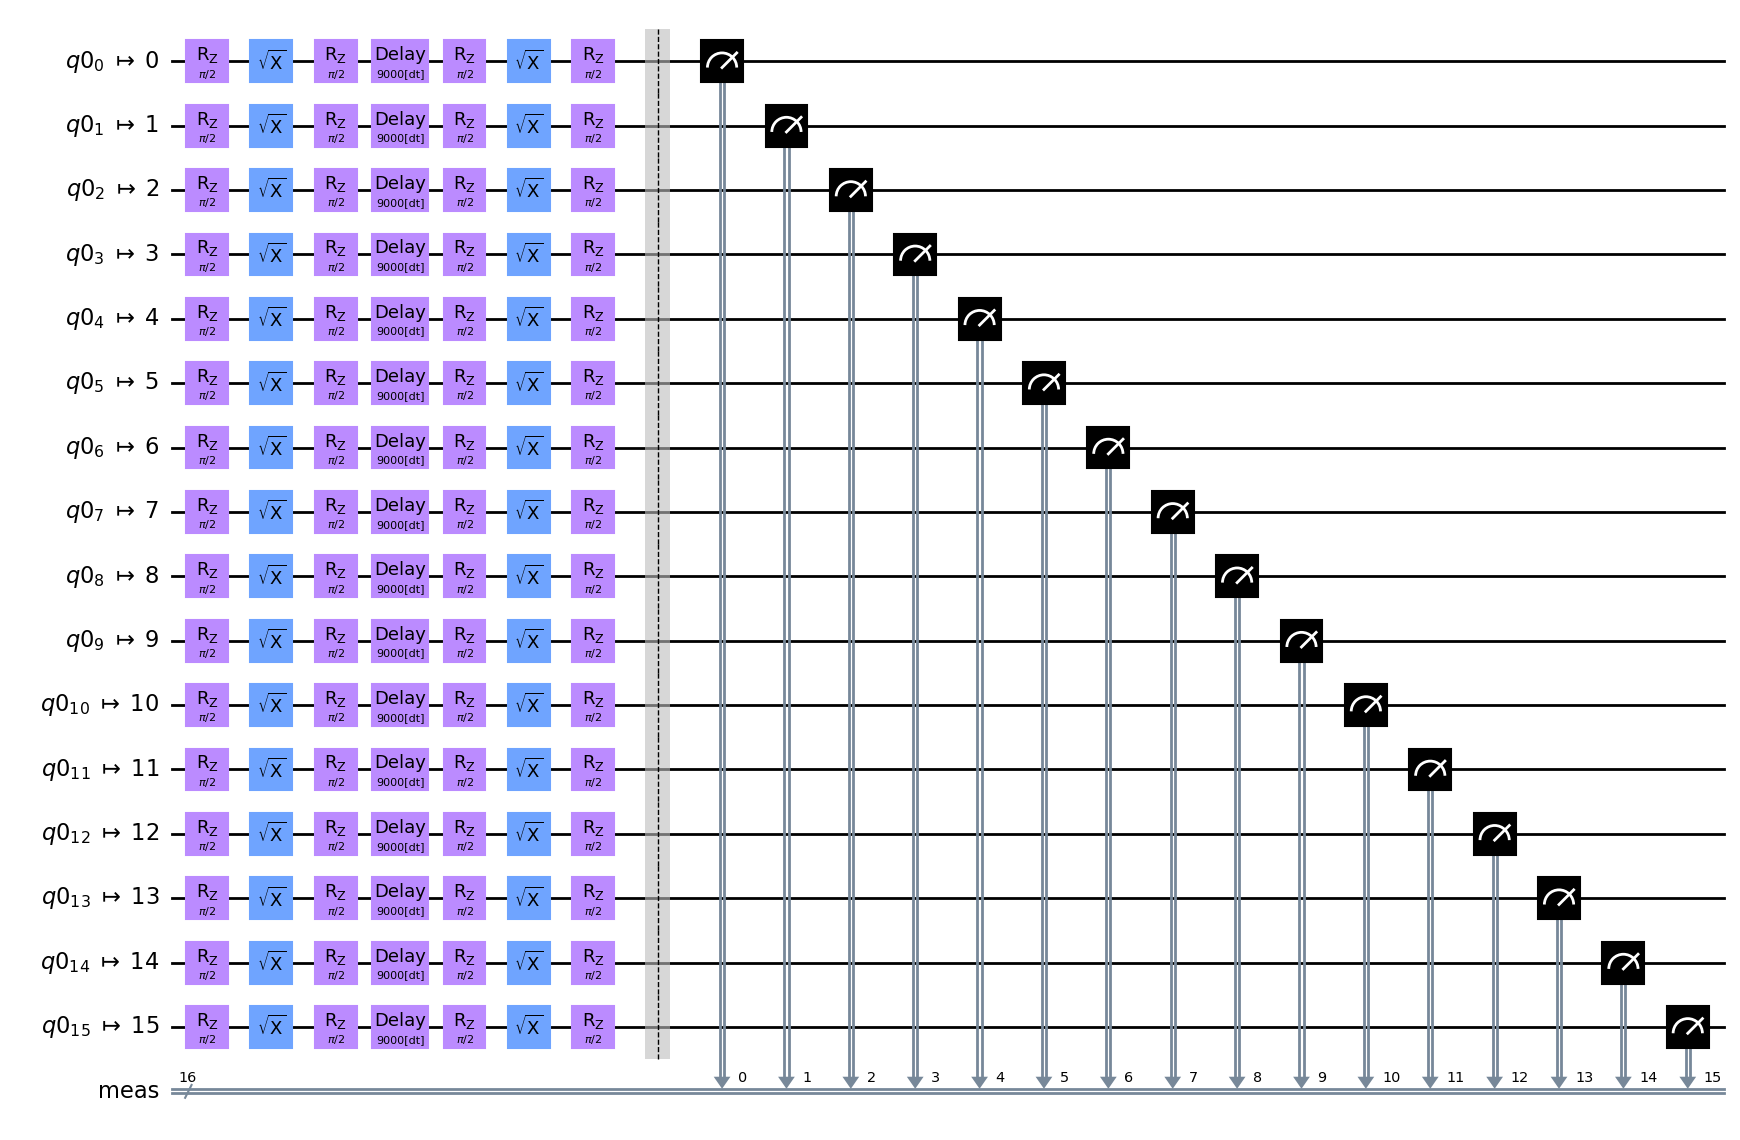

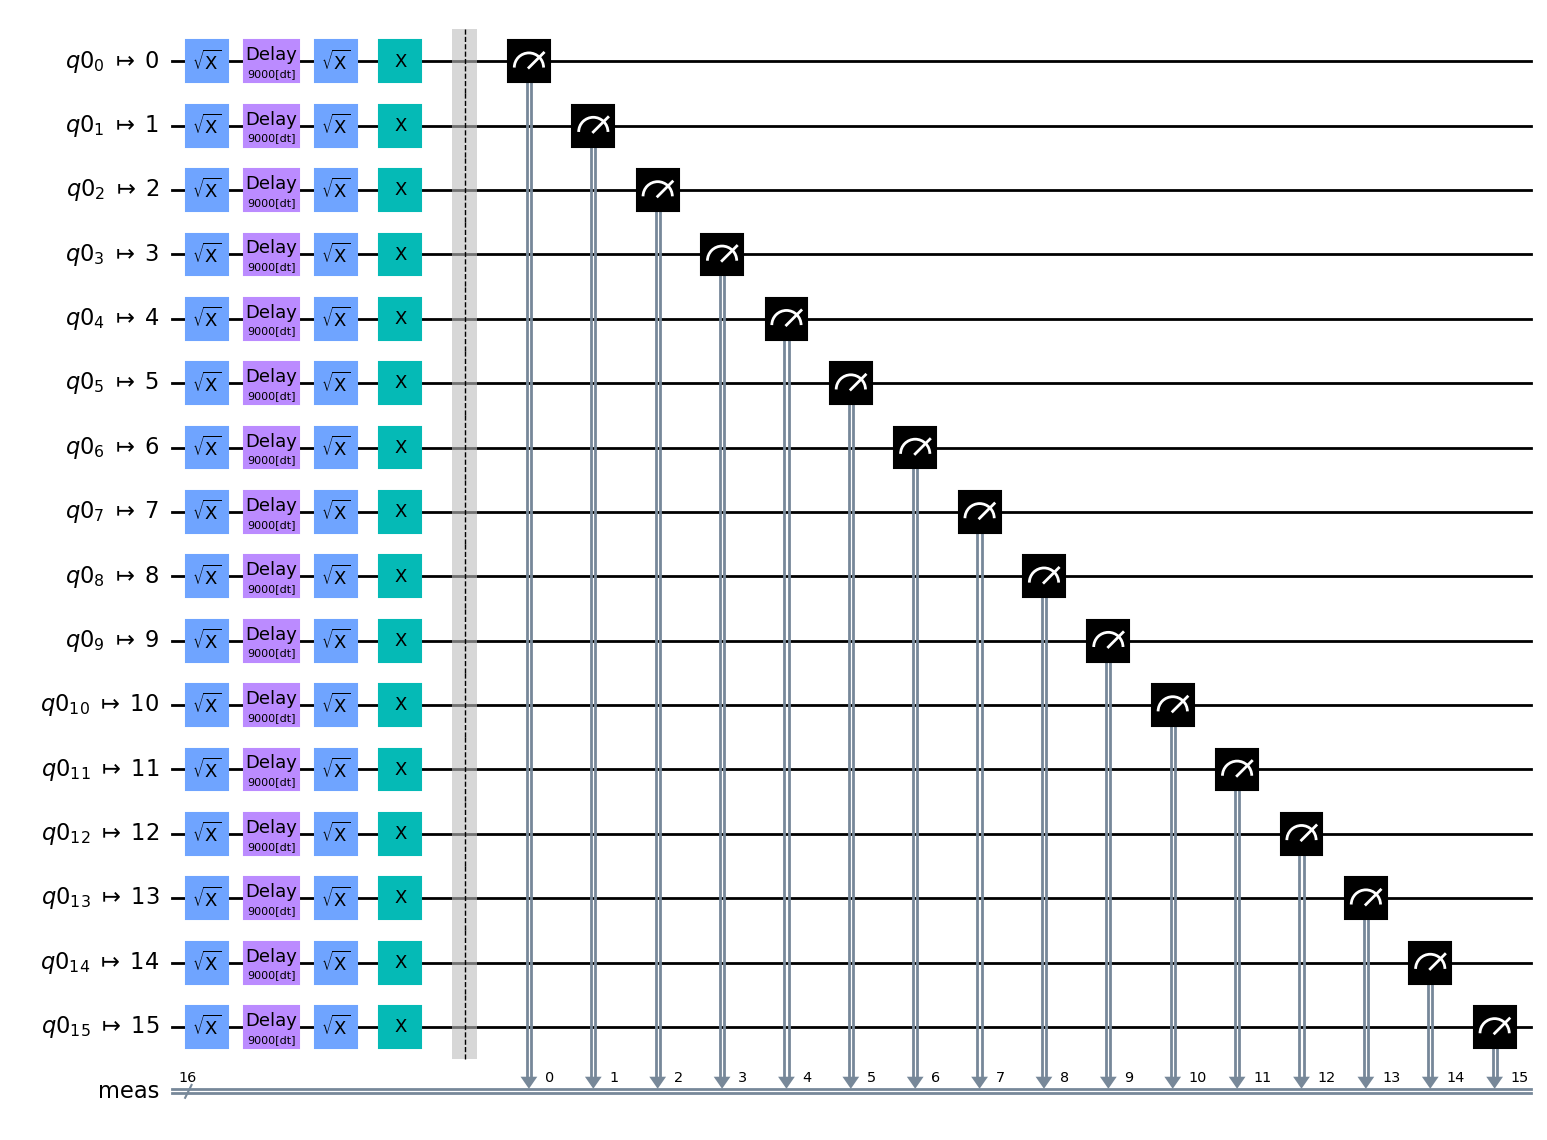

In [12]:
for tqc in tqcs:
    display(tqc.draw('mpl'))

In [11]:
# job = backend.run(tqcs, shots=8000)
# job.update_tags(['delay_9000'])
# print('New job: ', job.job_id())

# Create Circuits - 2

In [3]:
ibm_backend_name = 'ibmq_guadalupe'
backend = provider.get_backend(ibm_backend_name)

In [4]:
qregs = QuantumRegister(backend.num_qubits)
delay_param = Parameter('t')

In [52]:
qcs = []

## Empty

In [53]:
# qc = QuantumCircuit(qregs, name='empty')
# qc.delay(delay_param, qregs)
# qc.measure_all()
# qcs.append(qc)
# # qc.draw('mpl')

## Just delay

In [54]:

qc = QuantumCircuit(qregs, name='delay')
qc.delay(delay_param, qregs)
qc.measure_all()
qcs.append(qc)
# qc.draw('mpl')

## H delay H

In [55]:
qc = QuantumCircuit(qregs, name='H, delay, H')
qc.h(qregs)
qc.delay(delay_param, qregs)
qc.h(qregs)
qc.measure_all()
qcs.append(qc)
# qc.draw('mpl')

## sx, delay, sx, x

In [56]:
qc = QuantumCircuit(qregs, name='sx, delay, sx, x')
qc.sx(qregs)
qc.delay(delay_param, qregs)
qc.sx(qregs)
qc.x(qregs)
qc.measure_all()
qcs.append(qc)
# qc.draw('mpl')

## Apply delays

In [57]:
delays = [ 0, 100, 200, 400, 800, 1600, 3200, 6400 ]

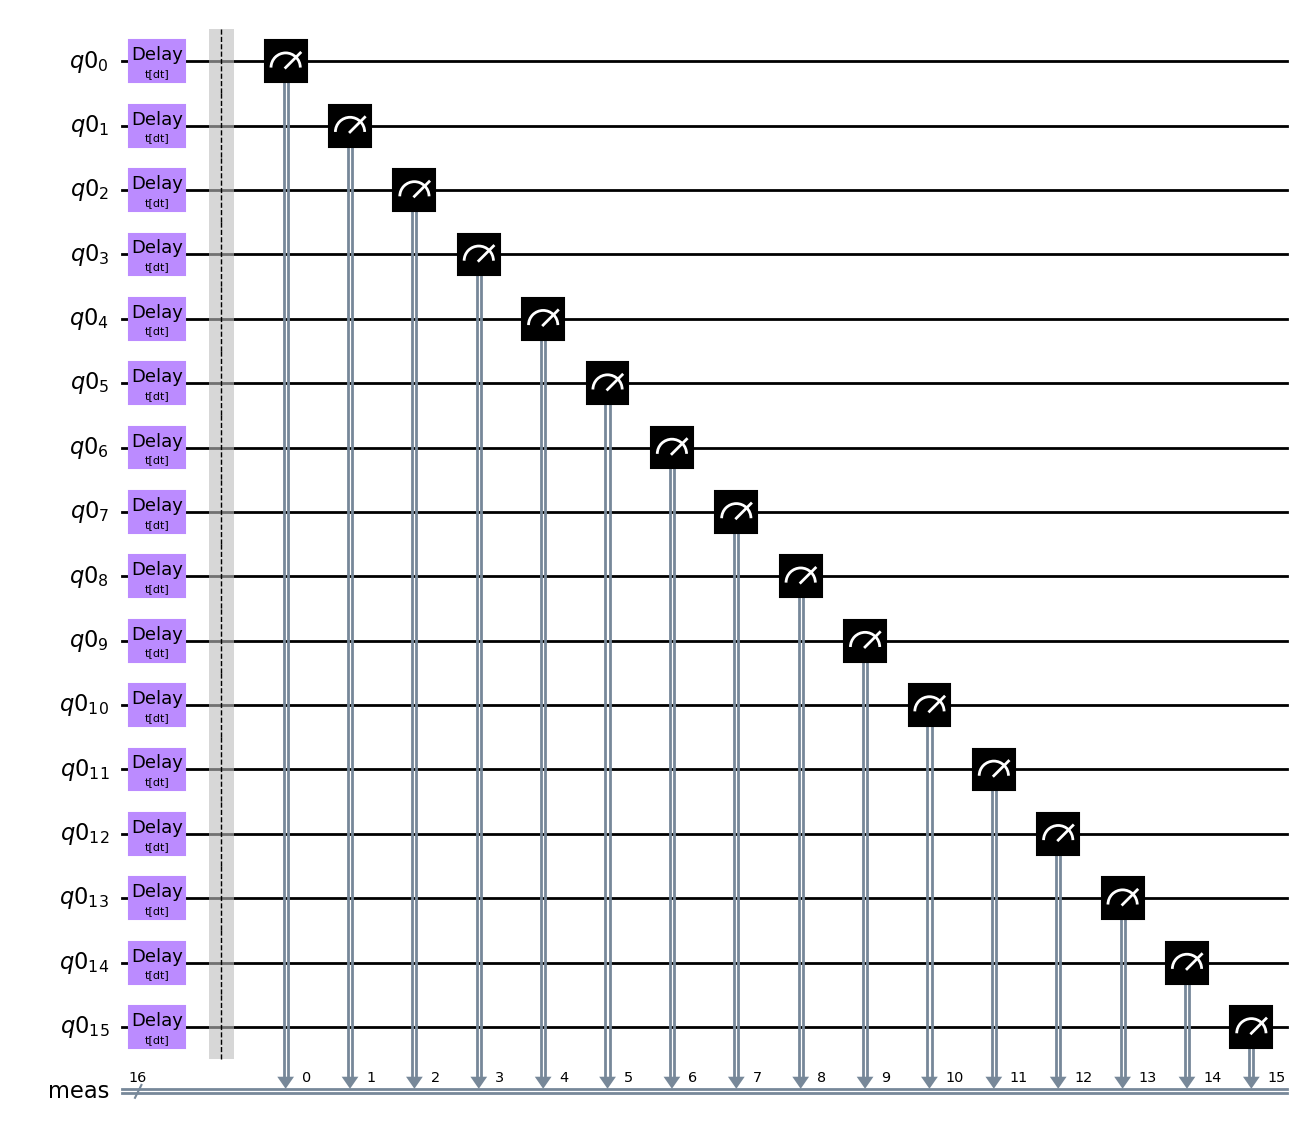

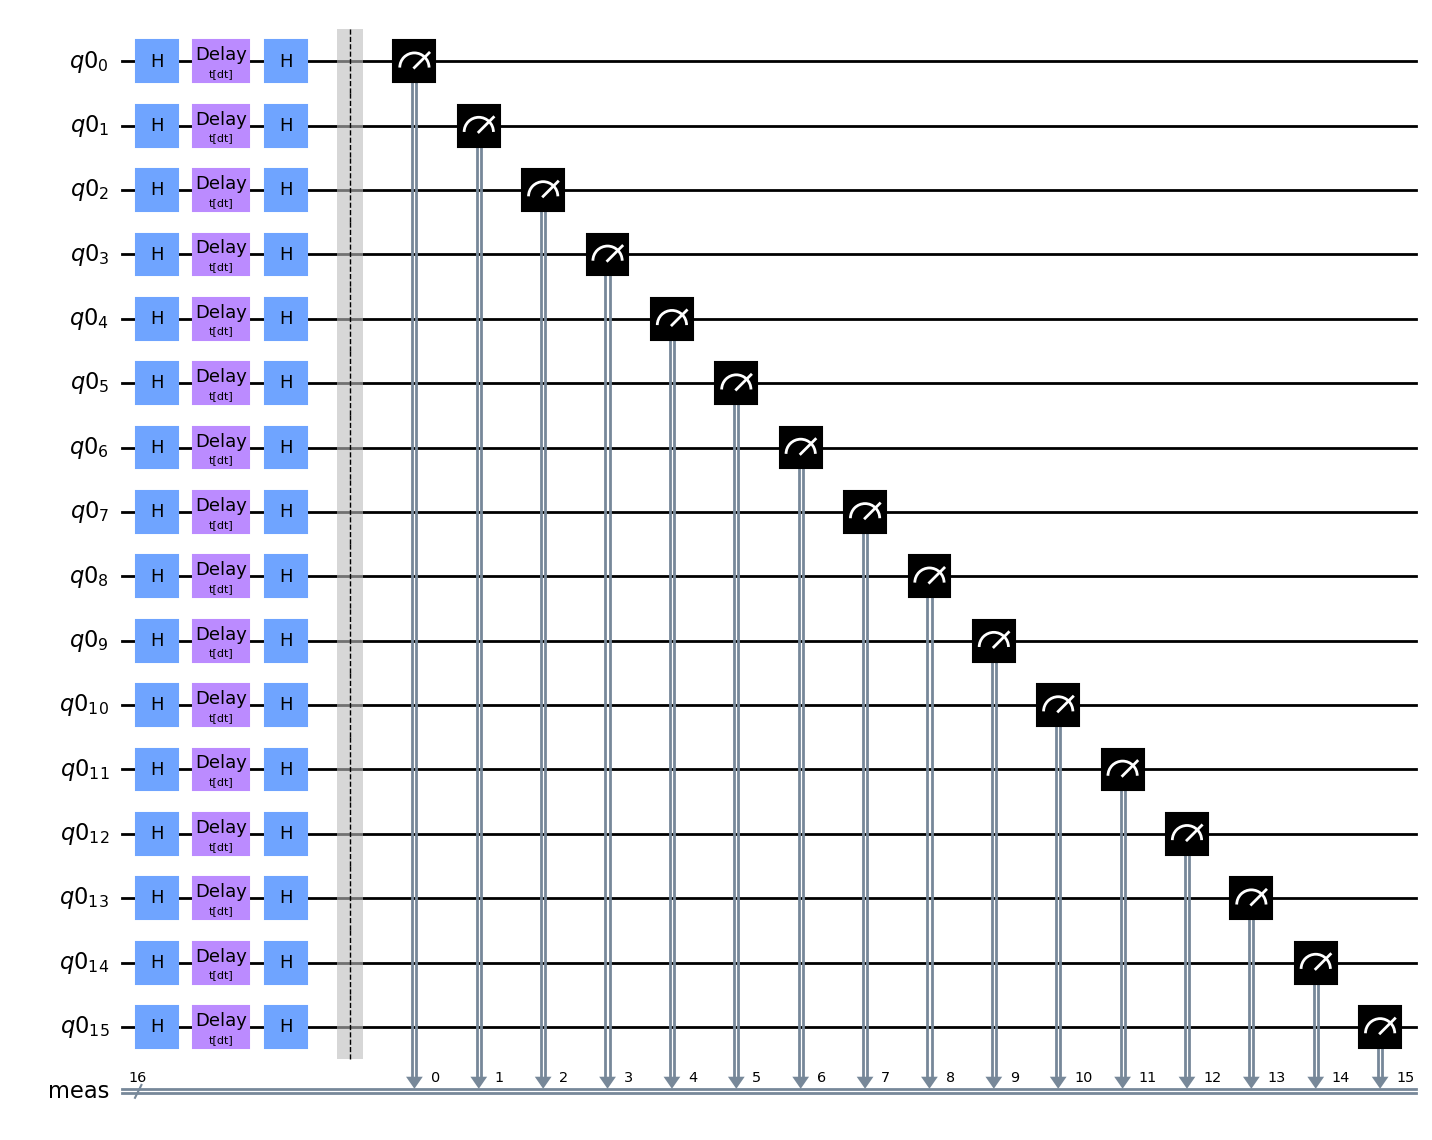

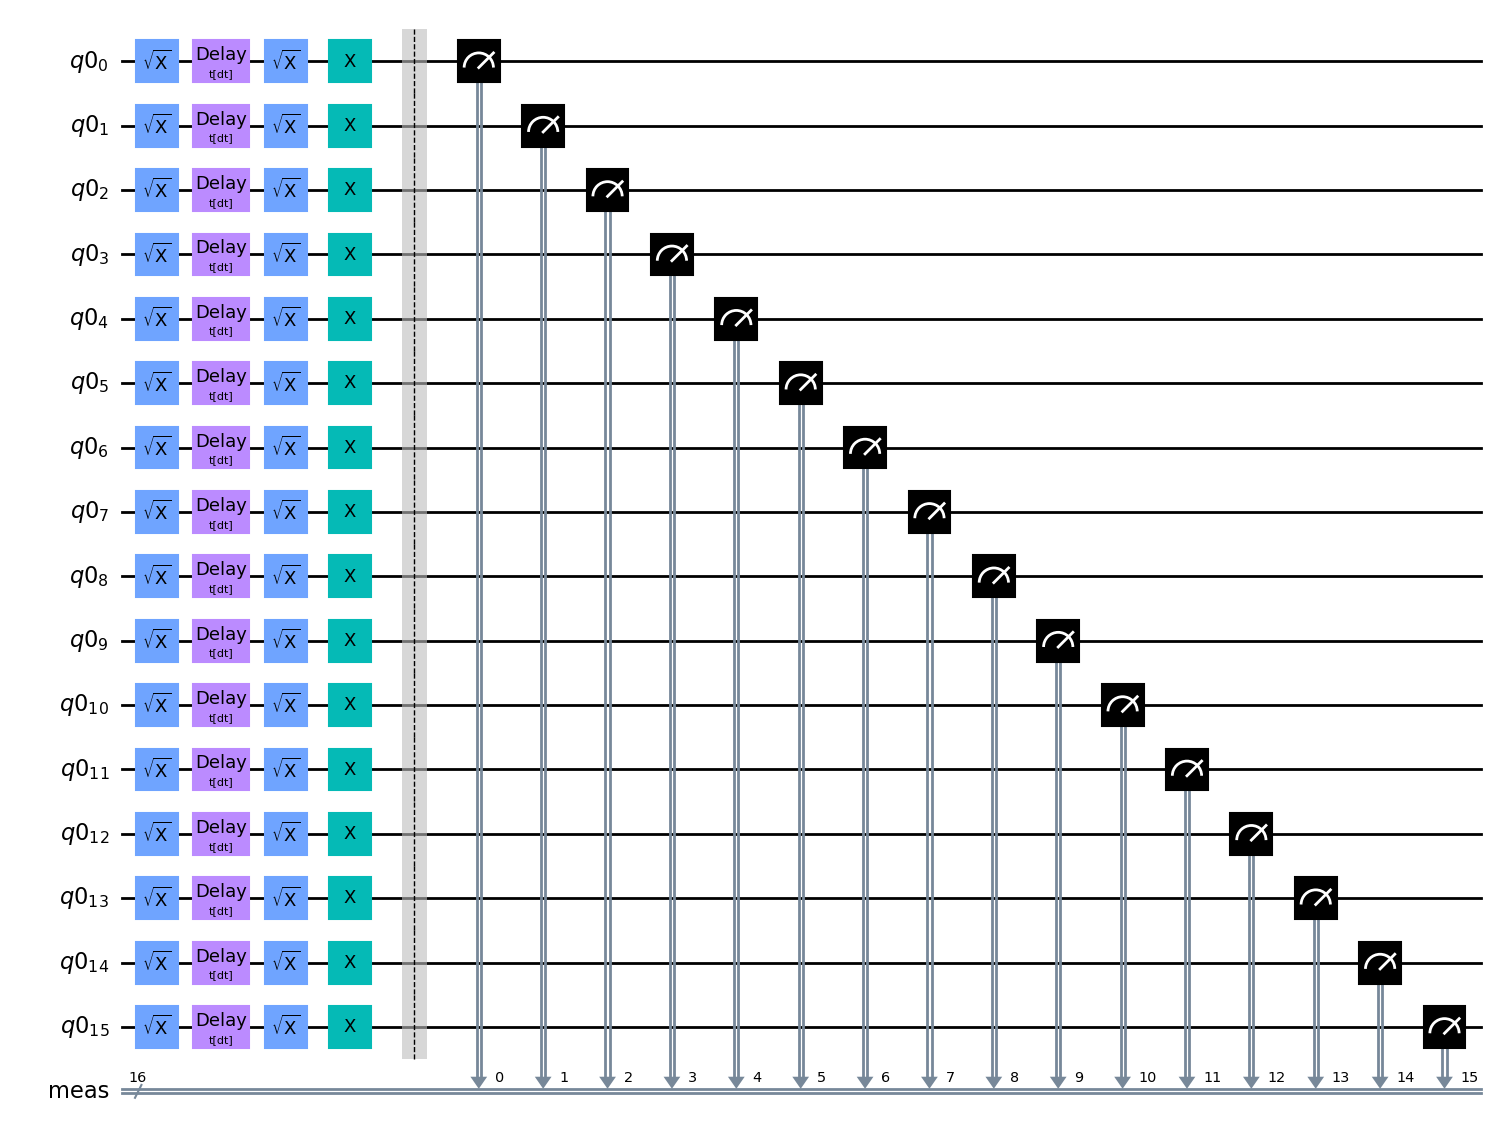

In [71]:
for qc in qcs:
    display(qc.draw('mpl'))

In [60]:
circuits = []
for qc in qcs:
    circuits.extend([qc.bind_parameters({delay_param: delay}) for delay in delays])

In [61]:
len(circuits)

24

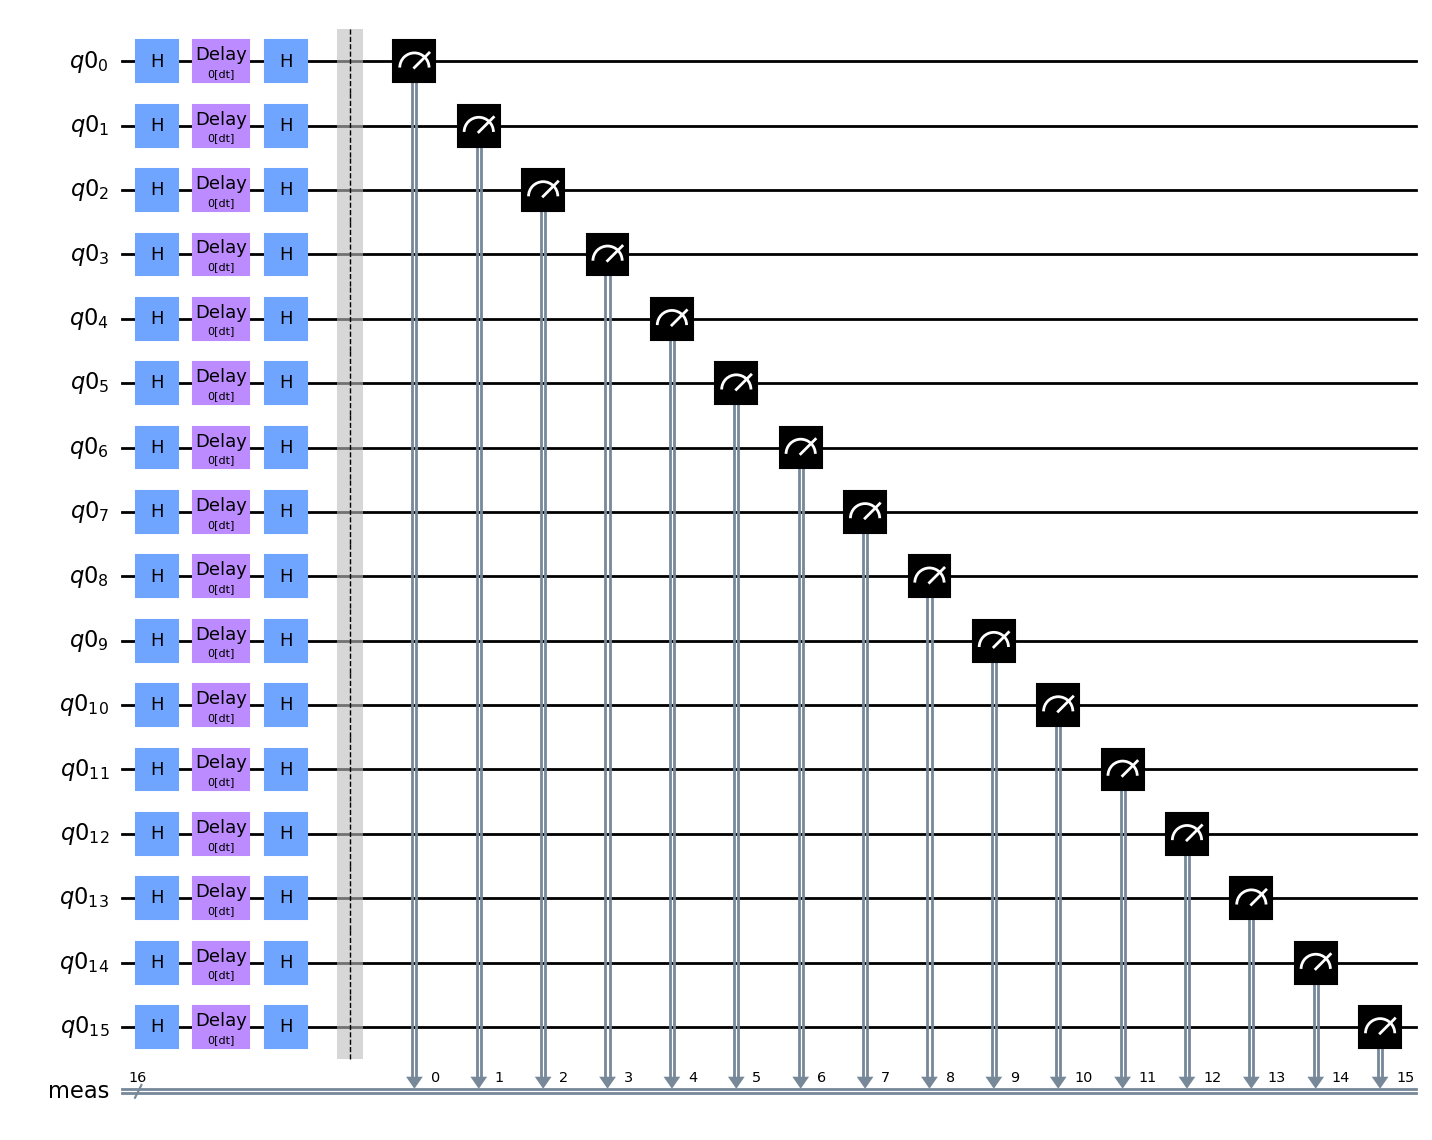

In [66]:
circuits[8].draw('mpl')

## Run on IBMQ

In [67]:
pm = generate_preset_pass_manager(0, backend)
tqcs = pm.run(circuits)

In [69]:
job = backend.run(tqcs, shots=8000)
job.update_tags(['delay_2'])
print('New job: ', job.job_id())

c:\Users\thspr\anaconda3\envs\bench\Lib\site-packages\qiskit_ibm_provider\ibm_backend.py:472: UserWarning: The backend ibmq_guadalupe is currently paused.
  warnings.warn(f"The backend {self.name} is currently paused.")


New job:  ci3g96alnlj7iib8amlg
